In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
# Crit information
PCR=0.75
CD=1.6

# Attack configuration paramters
StringLength=5
Trials=9*5  # esimated from time attack window as measured by time

# probability of missing
Pmiss=0.02

# Total samples of Y to be taken(Will sample Bernoulli distribution Trials*StringLength*TotalSamples number of times, (however some samplings are inherently parallelized) )
TotalYSamples=10000

In [3]:
## Ayaka
# # Damage of hits in string
# Di=np.zeros(5)
# BaseDMG=1649
# Di[0]=0.84*BaseDMG
# Di[1]=.894*BaseDMG
# Di[2]=1.15*BaseDMG
# Di[3]=.416*3*BaseDMG
# Di[4]=1.436*BaseDMG
########################################################################

## Eula
# # Damage of hits in string
Di=np.zeros(5)
BaseDMG=2821
Di[0]=1.6486*BaseDMG
Di[1]=1.7187*BaseDMG
Di[2]=2*1.0435*BaseDMG
Di[3]=2.0695*BaseDMG
Di[4]=2*1.31797*BaseDMG

In [4]:
# Define 5 Hit string Random Variable (Sj)
def FiveHitString(PCR,Pmiss,StringLength):
    # Construct Crit RV
    Zi = bernoulli.rvs(PCR, size=StringLength)
    Ci = (1+Zi*CD)

    # Define Miss RV
    Mi= bernoulli.rvs(1-Pmiss, size=StringLength)

    Hi=Di*Ci*Mi
    Si=sum(Hi)
    return Si

# Define Random variable Y_n
def SampleY(PCR,Pmiss,StringLength,Trials):
    Si=0
    for i in range (0,Trials):
        Si=Si+FiveHitString(PCR,Pmiss,StringLength)
    Y=Si/Trials
    return Y


In [5]:
# Compute array of Y_n samples
AVGDMG=np.zeros(TotalYSamples)
for j in range(0,TotalYSamples):
   AVGDMG[j]= SampleY(PCR,Pmiss,StringLength,Trials)


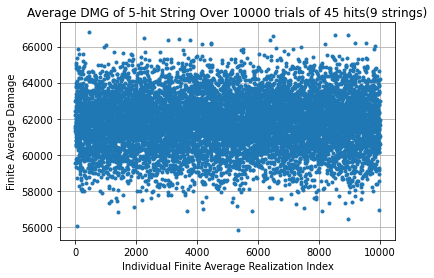

In [6]:
plt.plot(AVGDMG,".")
plt.ylabel("Finite Average Damage")
plt.xlabel("Individual Finite Average Realization Index")
plt.title("Average DMG of 5-hit String Over 10000 trials of 45 hits(9 strings)")
plt.grid()

Text(0, 0.5, 'Number of Samples in Damage Bins ')

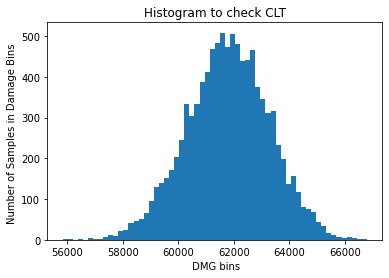

In [7]:
plt.hist(AVGDMG, bins='auto') 
plt.title("Histogram to check CLT")
plt.xlabel(" DMG bins")
plt.ylabel("Number of Samples in Damage Bins ")

In [8]:
AVG=np.average(AVGDMG)
Summand=(AVGDMG-AVG)**2.0
sigma=np.sqrt(np.sum(Summand)/TotalYSamples)

Text(0.5, 1.0, 'Average Damage of Eula AA string Over 9 Trials')

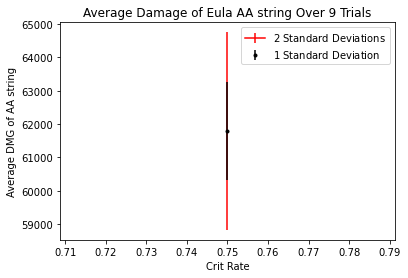

In [11]:
plt.errorbar(PCR,AVG, yerr=2*sigma,fmt='r',label="$2$ Standard Deviations")
plt.errorbar(PCR,AVG, yerr=sigma,fmt='.k', label="$1$ Standard Deviation" )
plt.ylabel("Average DMG of AA string")
plt.xlabel("Crit Rate")
plt.legend()
plt.title("Average Damage of Eula AA string Over 9 Trials")